# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
myBTC = 1.2
myETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btcResponse = requests.get(btc_url).json()
btcPrice = btcResponse['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
ethResponse = requests.get(eth_url).json()
ethPrice = ethResponse['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
myBTCvalue = myBTC * btcPrice
myETHvalue = myETH * ethPrice

# Print current crypto wallet balance
print(f"The current value of your {myBTC} BTC is ${myBTCvalue:0.2f}")
print(f"The current value of your {myETH} ETH is ${myETHvalue:0.2f}")

The current value of your 1.2 BTC is $63017.62
The current value of your 5.3 ETH is $21198.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
myAGG = 200
mySPY = 50

In [7]:
# Set Alpaca API key and secret
alpacaAPIkey = os.getenv('ALPACA_API_KEY')
alpacaSECRETkey = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpacaAPIkey, alpacaSECRETkey, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2022-01-07', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
investmentDF =alpaca.get_barset(tickers, timeframe, limit=1000).df

# Preview DataFrame
investmentDF.head(3).append(investmentDF.tail(3))

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2018-01-19 00:00:00-05:00  108.40  108.4000  108.14  108.15  2751607.0   
2018-01-22 00:00:00-05:00  108.22  108.2999  108.11  108.16  3020514.0   
2018-01-23 00:00:00-05:00  108.33  108.4401  108.29  108.39  3488873.0   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.90  112.93  7686662.0   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.66  112.81  6812819.0   
2022-01-07 00:00:00-05:00  112.69  112.7050  112.34  112.50  8338975.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2018-01-19 00:00:00-05:00     NaN     NaN       NaN     NaN         NaN  
2018-01-22 00:00:00-05:00  280.17  282.68  280.1100  282.67  47776828.0  
2018-01-23 00:00:00-05:00  282.74  283.62  282.3700  283.26  53406595.0  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38  87411658.0  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93  78577470.0  
2022-01-07 00:00:00-05:00  467.95  469.20  464.6500  466.12  67943055.0

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(investmentDF['AGG']['close'][-1])
spy_close_price = float(investmentDF['SPY']['close'][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.5
Current SPY closing price: $466.12


In [10]:
# Compute the current value of shares
my_spy_value = mySPY * spy_close_price
my_agg_value = myAGG * agg_close_price

# Print current value of shares
print(f"The current value of your {mySPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {myAGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23306.00
The current value of your 200 AGG shares is $22500.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthlyIncome = 12000

# Consolidate financial assets data
mySavings = [myBTCvalue + myETHvalue, my_spy_value + my_agg_value]

# Create savings DataFrame
savingsDF = pd.DataFrame(mySavings, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(savingsDF)

,amount
crypto,84215.975661
shares,45806.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

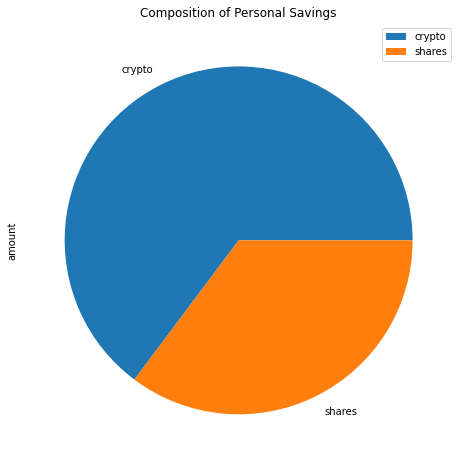

In [12]:
# Plot savings pie chart
savingsDF.plot.pie(y='amount', title='Composition of Personal Savings', figsize=(8,8))

In [13]:
# Set ideal emergency fund
emergency_fund = monthlyIncome * 3

# Calculate total amount of savings
total_savings = float(savingsDF.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, limit=1000).df

# Display sample data
df_stock_data.head(3).append(df_stock_data.tail(3))

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2018-01-19 00:00:00-05:00  108.40  108.4000  108.14  108.15  2751607.0   
2018-01-22 00:00:00-05:00  108.22  108.2999  108.11  108.16  3020514.0   
2018-01-23 00:00:00-05:00  108.33  108.4401  108.29  108.39  3488873.0   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.90  112.93  7686662.0   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.66  112.81  6812819.0   
2022-01-07 00:00:00-05:00  112.69  112.7050  112.34  112.50  8338975.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2018-01-19 00:00:00-05:00     NaN     NaN       NaN     NaN         NaN  
2018-01-22 00:00:00-05:00  280.17  282.68  280.1100  282.67  47776828.0  
2018-01-23 00:00:00-05:00  282.74  283.62  282.3700  283.26  53406595.0  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38  87411658.0  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93  78577470.0  
2022-01-07 00:00:00-05:00  467.95  469.20  464.6500  466.12  67943055.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC30year.portfolio_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2018-01-19 00:00:00-05:00  108.40  108.4000  108.14  108.15  2751607.0   
2018-01-22 00:00:00-05:00  108.22  108.2999  108.11  108.16  3020514.0   
2018-01-23 00:00:00-05:00  108.33  108.4401  108.29  108.39  3488873.0   
2018-01-24 00:00:00-05:00  108.25  108.3200  108.15  108.28  2004492.0   
2018-01-25 00:00:00-05:00  108.26  108.5700  108.19  108.56  9339661.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2018-01-19 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2018-01-22 00:00:00-05:00     0.000092  280.17  282.68  280.110  282.67   
2018-01-23 00:00:00-05:00     0.002126  282.74  283.62  282.370  283.26   
2018-01-24 00:00:00-05:00    -0.001015  283.99  284.70  281.840  283.18   
2018-01-25 00:00:00-05:00     0.002586  284.16  284.27  282.405  283.28   

                                                    
                               volume daily_return  
time                                                
2018-01-19 00:00:00-05:00         NaN          NaN  
2018-01-22 00:00:00-05:00  47776828.0          NaN  
2018-01-23 00:00:00-05:00  53406595.0     0.002087  
2018-01-24 00:00:00-05:00  77334662.0    -0.000282  
2018-01-25 00:00:00-05:00  51821059.0     0.000353

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007558,0.998170,1.004340,0.995847,1.010093,0.997501,1.005959,1.004730,0.997527,0.983965,...,1.013352,1.005463,1.006776,1.013988,0.999458,1.002563,1.000400,0.999812,1.006618,1.012917
2,1.016295,0.990714,1.016481,0.981465,1.002955,1.002099,1.004695,1.002939,0.979194,0.995573,...,1.009922,0.999701,1.009775,1.017695,1.004078,1.022464,1.014820,0.989711,1.004486,1.013386
3,1.013316,0.978215,1.013208,0.977525,1.013447,0.990476,1.010573,1.004449,0.989980,0.990828,...,1.017238,1.004023,1.005784,1.016497,1.014600,1.027078,1.028273,0.975973,1.006463,1.010668
4,1.014774,0.975515,0.999291,0.977497,1.006933,0.998059,1.002897,1.015281,0.978612,0.986042,...,1.016621,1.012011,1.003064,1.033089,1.019292,1.018815,1.040108,0.997030,1.025694,1.013800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,42.055690,10.861855,7.324989,9.251391,12.010061,8.582773,11.825728,8.270288,13.839590,18.888093,...,9.685216,36.528980,16.809669,25.620344,12.306044,10.535154,2.739345,20.015304,21.219934,10.592488
7557,41.965878,10.856655,7.280300,9.244519,12.026245,8.634273,11.729937,8.219609,13.911335,18.894285,...,9.744887,36.447643,16.985262,25.777559,12.150697,10.556643,2.690176,20.221037,21.095900,10.556482
7558,42.153193,10.981014,7.326687,9.247122,12.251111,8.811311,11.719185,8.237147,13.805725,18.707644,...,9.797796,36.689820,17.009724,25.718708,12.332426,10.619808,2.692460,20.200231,21.381539,10.410927
7559,42.089698,11.057013,7.420361,9.324355,12.359607,8.828231,11.663383,8.247968,13.747610,18.519885,...,9.757735,37.005382,17.171896,25.480209,12.525304,10.706104,2.670922,20.349418,21.464025,10.333286


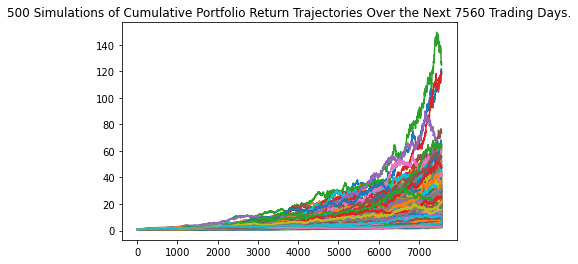

In [19]:
# Plot simulation outcomes
line_plot = MC30year.plot_simulation()

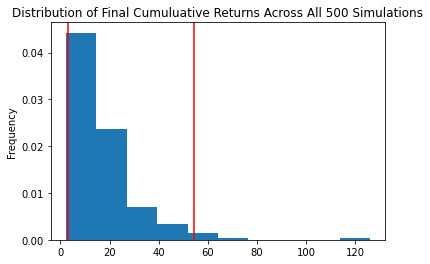

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.408888
std              14.659562
min               2.179725
25%               8.168306
50%              13.454500
75%              21.683302
max             126.048627
95% CI Lower      3.195028
95% CI Upper     54.170846
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $63900.57 and $1083416.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $95850.85 and $1625125.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997571,0.992046,0.999182,0.995278,1.005163,1.004710,0.995459,0.996165,0.995993,0.996969,...,1.004378,1.001630,1.006375,0.997289,1.001025,1.002942,0.994455,1.003189,1.001573,0.994813
2,0.997949,0.993480,1.000544,0.998145,1.005924,1.002093,0.993000,0.997757,0.993040,0.995507,...,1.001132,0.994622,1.004076,0.994659,1.003307,1.005235,1.001679,0.999448,1.004555,0.995189
3,0.999922,0.988080,1.007198,0.996198,1.011274,1.009133,0.994595,1.004974,0.996043,0.994083,...,0.997977,0.998208,1.002262,0.991433,1.001080,1.000382,0.989349,1.005528,1.003534,0.993632
4,1.000908,0.983438,1.006011,0.990591,1.007997,1.021321,0.996037,1.003823,0.992117,0.991186,...,1.003570,0.996986,1.003620,1.002043,0.999048,1.001968,0.991104,1.008396,1.009284,0.990936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.088839,1.139765,1.260551,1.186612,1.319289,1.206612,1.166618,1.317709,1.323264,0.969702,...,1.214344,1.134354,1.579100,1.042551,1.212235,1.091897,0.975828,1.212174,1.409043,1.421664
1257,1.089693,1.140110,1.260055,1.180546,1.315782,1.197018,1.169460,1.322149,1.324950,0.970715,...,1.207901,1.136293,1.578432,1.048086,1.216192,1.095923,0.971694,1.212915,1.402223,1.430337
1258,1.091845,1.143874,1.258654,1.191277,1.318422,1.201853,1.170147,1.328252,1.331086,0.976062,...,1.208360,1.130363,1.579761,1.047032,1.209189,1.102657,0.975318,1.213552,1.402860,1.426364
1259,1.088560,1.153439,1.269386,1.190009,1.319895,1.206623,1.180338,1.331726,1.333432,0.974542,...,1.207210,1.126720,1.572504,1.043103,1.203948,1.096096,0.982553,1.223359,1.398183,1.432456


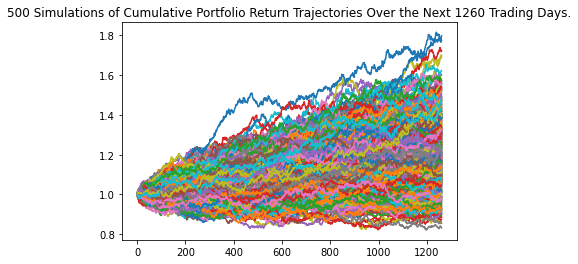

In [28]:
# Plot simulation outcomes
line_plot5 = MC5year.plot_simulation()

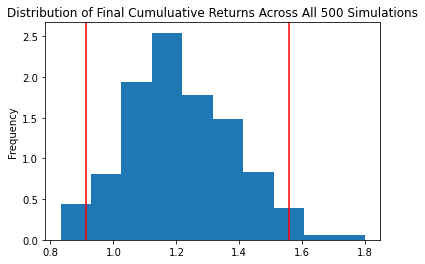

In [29]:
# Plot probability distribution and confidence intervals
dist_plot5 = MC5year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = MC5year.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

count           500.000000
mean              1.216525
std               0.169324
min               0.831897
25%               1.096180
50%               1.196141
75%               1.328424
max               1.798707
95% CI Lower      0.914389
95% CI Upper      1.558616
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl5[8] * initial_investment, 2)
ci_upper_five = round(tbl5[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54863.32 and $93516.96


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998920,1.002136,0.999072,0.998251,1.009262,0.998512,1.000925,0.999367,0.994323,0.996182,...,1.001027,1.000622,1.001690,0.998913,1.000034,0.999838,1.000156,1.000652,1.002675,0.999233
2,1.000124,1.001803,1.000857,0.994910,1.008606,0.997087,1.001612,1.001021,0.998264,0.996753,...,0.996979,1.004187,0.998076,0.996880,0.996410,1.000009,0.997983,1.002641,1.003389,1.000122
3,1.000890,1.007009,1.004754,0.994099,1.005459,1.001488,1.004740,1.000142,1.000736,0.997235,...,0.998695,1.003852,0.999973,0.997888,0.993721,1.001618,0.994444,1.008681,1.002435,0.998990
4,1.000355,1.007076,1.001787,0.986910,1.002559,1.002932,1.007831,1.002219,1.001428,0.993719,...,0.995335,1.000826,1.005438,0.995486,0.992964,0.999526,0.998770,1.006930,1.001455,0.998295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.254080,1.378740,2.752606,2.203921,1.421208,1.538602,1.394877,1.656794,1.103561,1.294162,...,1.447663,1.859029,1.683723,1.144964,1.592072,1.687937,1.261106,1.692878,1.377942,1.937605
2517,1.252353,1.381718,2.760018,2.202361,1.415384,1.548891,1.390990,1.653227,1.108709,1.293887,...,1.442842,1.859855,1.690191,1.151333,1.596513,1.682262,1.255510,1.682458,1.382257,1.940971
2518,1.252530,1.391219,2.771897,2.208024,1.422553,1.554393,1.393621,1.651486,1.113950,1.293209,...,1.457439,1.863944,1.706112,1.150397,1.604661,1.686711,1.257422,1.679169,1.386731,1.946661
2519,1.246658,1.388164,2.779324,2.214186,1.423766,1.554710,1.394571,1.644610,1.108892,1.299510,...,1.453456,1.864703,1.706142,1.157227,1.607411,1.689014,1.264944,1.679269,1.386428,1.946528


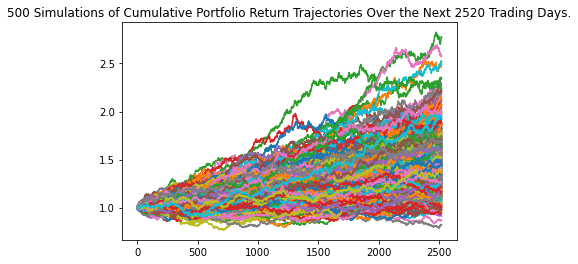

In [36]:
# Plot simulation outcomes
line_plot_ten = MC10year.plot_simulation()

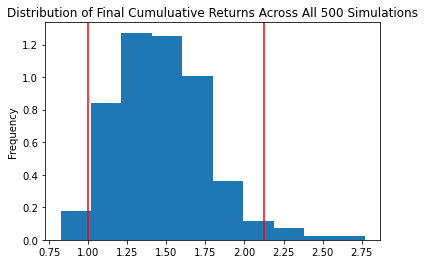

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC10year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC10year.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count           500.000000
mean              1.466325
std               0.288787
min               0.821981
25%               1.255702
50%               1.442951
75%               1.637031
max               2.770993
95% CI Lower      0.998825
95% CI Upper      2.126896
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl10[8] * initial_investment, 2)
ci_upper_ten = round(tbl10[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59929.49 and $127613.73
